<a href="https://colab.research.google.com/github/tfranke0814/pytorch-deep-learning/blob/main/01_pytorch_workflow_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch, numpy as np
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.6.0+cu124'

In [2]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

**Useful Stuff**
1. torchvision.transforms, torch.utils.data.Dataset, torch.utils.data.DataLoader
2. torch.nn, torch.nn.Module, torchvision.models, torch.optim
4. torchmetrics
5. torch.utils.tensorboard

## 1. Data (Preparing and Loading)

Data could be almost anything in ML

- Excel spreadsheets
- Images
- Audio
- DNA
- Text

ML is a game of two parts
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation


\\
Linear Regression with *known* **parameters**

\\
Useful: torchvision.transforms, torch.utils.data.Dataset, torch.utils.data.DataLoader

In [3]:
# "known" parameters
weight = 0.7
bias = 0.3

# Create data
start = 0; end = 1; step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10], len(X), len(y), X.shape, y.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50,
 torch.Size([50, 1]),
 torch.Size([50, 1]))

### Splitting data into train and test sets

Create Training and Test for our data.
(sklearn.model_selection.train_test_split)

In [4]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How to visualize the data???

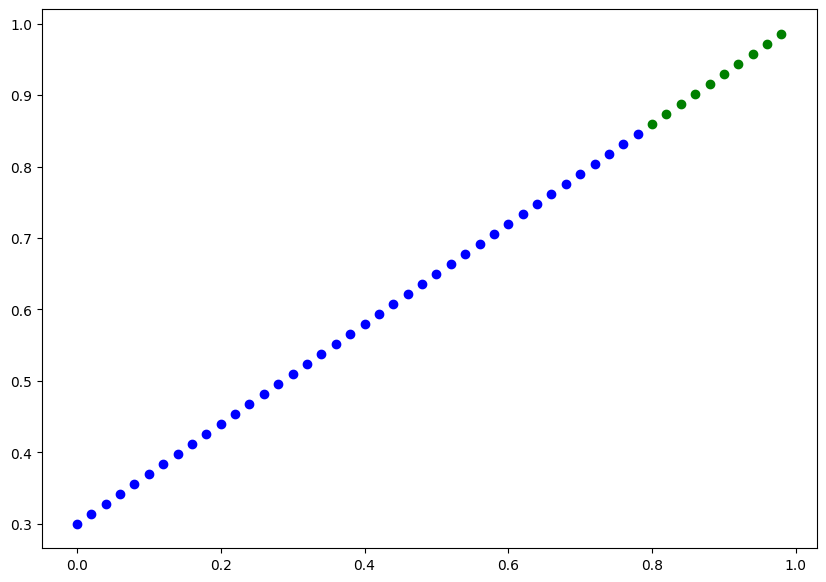

In [5]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="training data")
plt.scatter(X_test, y_test, c="g", label="testing data")
plt.show()

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions in red, if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


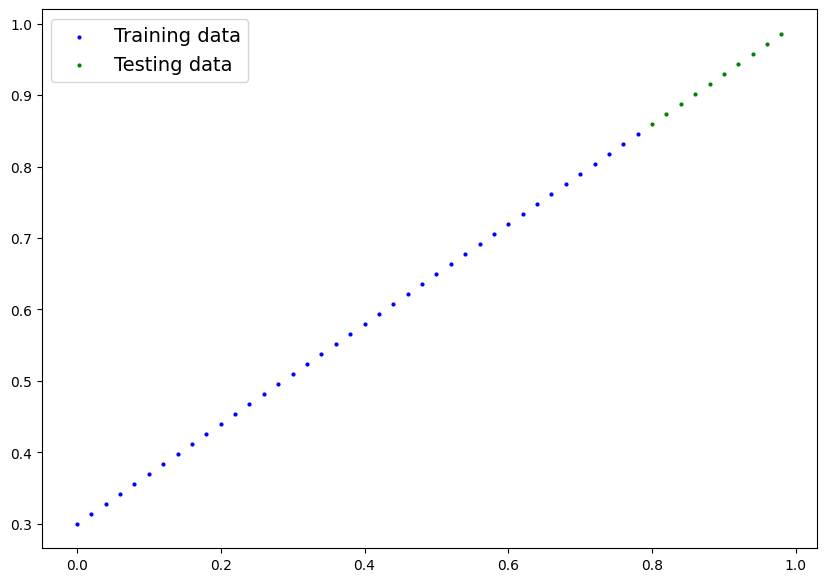

In [7]:
plot_predictions()

## 2. Build Model
What our model does:

Start with random values (weight & bias)
Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

Through two main algorithms:

1. Gradient descent - https://youtu.be/IHZwWFHWa-w \\
2. Backpropagation - https://youtu.be/Ilg3gGewQ5U

\\
Useful: torch.nn, torch.nn.Module, torchvision.models, torch.optim

In [8]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everyting in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True, # This is default
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias # this is the linear regression formula

In [9]:
# model = LinearRegressionModel()
# model.forward(X_train)

### PyTorch model building essentials

- torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)

- torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us

- torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()

- torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent

- def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

5:25:58 - https://www.youtube.com/watch?v=LyJtbe__2i0&t=5h25m58s

In [10]:
torch.randn(1)

tensor([-1.9834])

### Checking contents of our PyTorch model

Now we have made it, let's seee inside...

Cehck out the parameters, or what's inside model with `.parameters()`

In [11]:
torch.manual_seed(42)
model_0 = LinearRegressionModel() # Instance of the model, a subclass of nn.Module
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
weight, bias

(0.7, 0.3)

### Making predictions using `torch.inference_mode()`

To check model's predictive power, we'll make predictions on `y_test` based on `x_test`

Passing data through our model will run through the `forward()` method

In [14]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [15]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

https://x.com/PyTorch/status/1437838231505096708?s=20&t=cnKavO9iTgwQ-rfri6u7PQ

In [16]:
# Make predictions with the model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [17]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

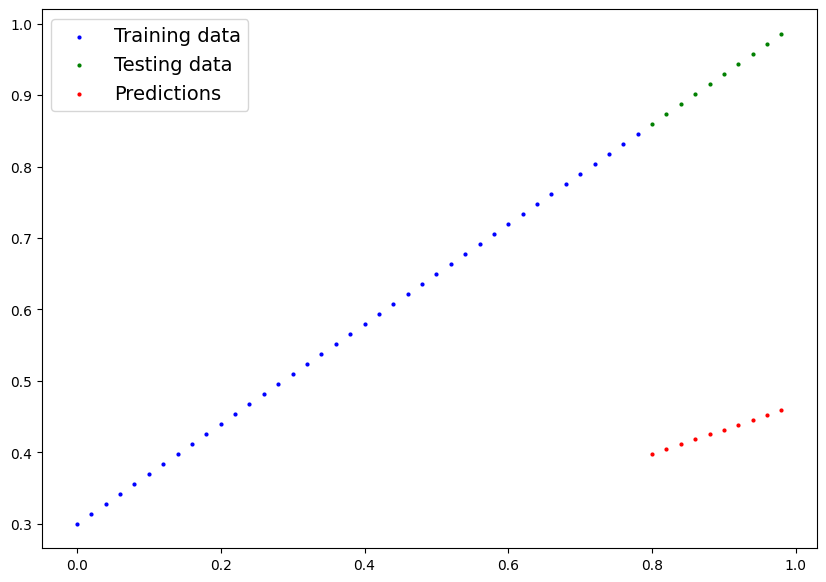

In [18]:
plot_predictions(predictions=y_preds)

## 3. Train Model

The whole idea of training is to move from *unknown* parameters to *known* parameters

Otherwise, from poor to good representaion
One way to measure how poor/wrong the predictions are, is with a loss function.

* Note: Loss function may also becalled cost function or criterion in different areas. We'll refer to it as a loss function.

Things we need to train:

* **Loss Function:** A function to measure how wrong your model's predictions are from the ideal output. Thus, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters(e.g. weight & bias) to improve the loss function.

And speciffically for PyTorch, we need:
* A training loop
* A testing loop

In [19]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [20]:
model_0.state_dict() # A model parameter is a value that the model sets itself

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [21]:
# Setup a loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Setup an optimizer (stochastic gradient descentf)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001) # lr = learning rate; Too high and it won't converge, to low and it'll converge very slowly

In [22]:
loss_fn

L1Loss()

6:07:00 - https://www.youtube.com/watch?v=LyJtbe__2i0&t=6h7m

### Building a training loop (and a testing loop) in PyTorch

A couple of things needed for a training loop:
0. Loop through the data
1. Forward pass: Make predictions on data (using the `forward()` function on the `model` object) - aka forward propagation
2. Calculate the loss (Compare the forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients - aka **backpropagation**
5. Optimizer step - Use optimizer to adjust the model parameters to improve the loss - aka **gradient descent**

In [23]:
torch.manual_seed(42)
#model_0 = LinearRegressionModel() # Instance of the model, a subclass of nn.Module
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [24]:
torch.manual_seed(42)
# An epoch is one loop through the data... (Hyperparameter bc we set it ourself)
epochs = 2000

# Track different values
epochs_count = []
loss_values = []
test_loss_values = []

print(model_0.state_dict())
### Training
## 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # Sets all parameters that requires gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward - Backpropigation
  loss.backward()

  # 5. Optimizer step - Gradient Descent
  optimizer.step() # By default optimizer changes will accumulate through the loop... so we have to zero them in step 3 (in the next iteration)

  ### Testing
  model_0.eval() # tuyrns off different setting sthat aren't needed for evaluation/testing
  with torch.inference_mode(): # Turns off gradient tracking and some other things
    # 1. Forward pass
    test_pred = model_0(X_test)
    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happenin'
  if epoch % 100 == 0:
    epochs_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
# Print out model state_dict()
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.4931890368461609
Epoch: 100 | Loss: 0.19767141342163086 | Test loss: 0.35847947001457214
Epoch: 200 | Loss: 0.08973254263401031 | Test loss: 0.22795839607715607
Epoch: 300 | Loss: 0.05357731133699417 | Test loss: 0.15086300671100616
Epoch: 400 | Loss: 0.04549176245927811 | Test loss: 0.11657620966434479
Epoch: 500 | Loss: 0.04160415381193161 | Test loss: 0.10088418424129486
Epoch: 600 | Loss: 0.03811401128768921 | Test loss: 0.08986451476812363
Epoch: 700 | Loss: 0.03466346859931946 | Test loss: 0.08097299933433533
Epoch: 800 | Loss: 0.03122851625084877 | Test loss: 0.07297395914793015
Epoch: 900 | Loss: 0.027794325724244118 | Test loss: 0.06490625441074371
Epoch: 1000 | Loss: 0.02435956709086895 | Test loss: 0.05690721794962883
Epoch: 1100 | Loss: 0.02092517353594303 | Test loss: 0.0488395169377327
Epoch: 1200 | Loss: 0.017490629106760025 | Test loss: 0.04084048

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [25]:
epochs_count, loss_values, test_loss_values

([0,
  100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200,
  1300,
  1400,
  1500,
  1600,
  1700,
  1800,
  1900],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0897, grad_fn=<MeanBackward0>),
  tensor(0.0536, grad_fn=<MeanBackward0>),
  tensor(0.0455, grad_fn=<MeanBackward0>),
  tensor(0.0416, grad_fn=<MeanBackward0>),
  tensor(0.0381, grad_fn=<MeanBackward0>),
  tensor(0.0347, grad_fn=<MeanBackward0>),
  tensor(0.0312, grad_fn=<MeanBackward0>),
  tensor(0.0278, grad_fn=<MeanBackward0>),
  tensor(0.0244, grad_fn=<MeanBackward0>),
  tensor(0.0209, grad_fn=<MeanBackward0>),
  tensor(0.0175, grad_fn=<MeanBackward0>),
  tensor(0.0141, grad_fn=<MeanBackward0>),
  tensor(0.0106, grad_fn=<MeanBackward0>),
  tensor(0.0072, grad_fn=<MeanBackward0>),
  tensor(0.0038, grad_fn=<MeanBackward0>),
  tensor(0.0003, grad_fn=<MeanBackward0>),
  tensor(0.0004, grad_fn=<MeanBackward0>),
  tensor(0.0004, grad_fn=<MeanBack

In [26]:
torch.tensor(loss_values).numpy()

array([0.31288138, 0.19767141, 0.08973254, 0.05357731, 0.04549176,
       0.04160415, 0.03811401, 0.03466347, 0.03122852, 0.02779433,
       0.02435957, 0.02092517, 0.01749063, 0.01405602, 0.01062168,
       0.00718688, 0.00375231, 0.00031773, 0.0004445 , 0.0004445 ],
      dtype=float32)

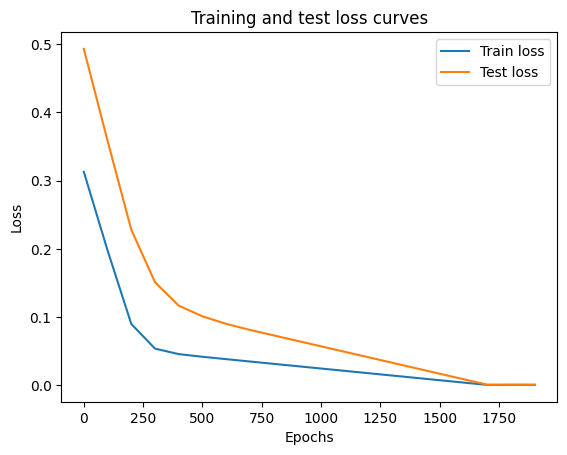

In [27]:
# Plot the loss curves
plt.plot(epochs_count, torch.tensor(loss_values).numpy(), label="Train loss")
plt.plot(epochs_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

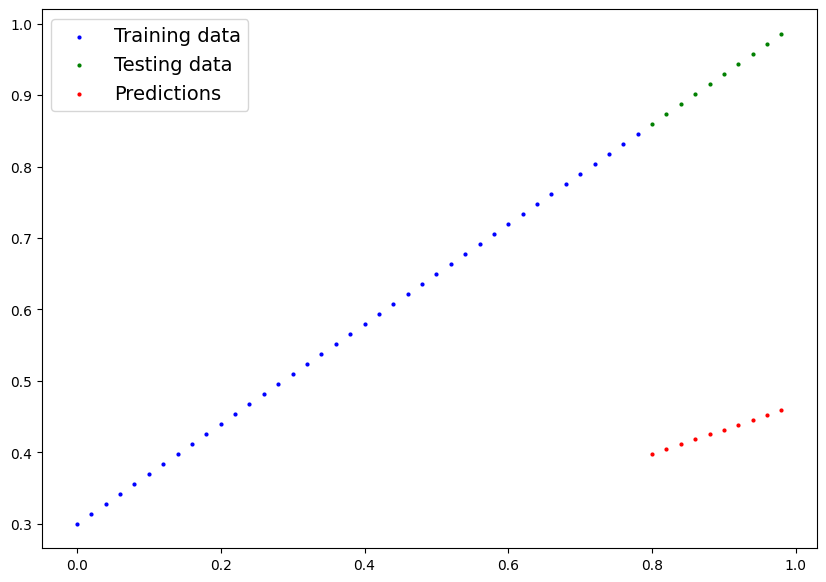

In [28]:
plot_predictions(predictions=y_preds)

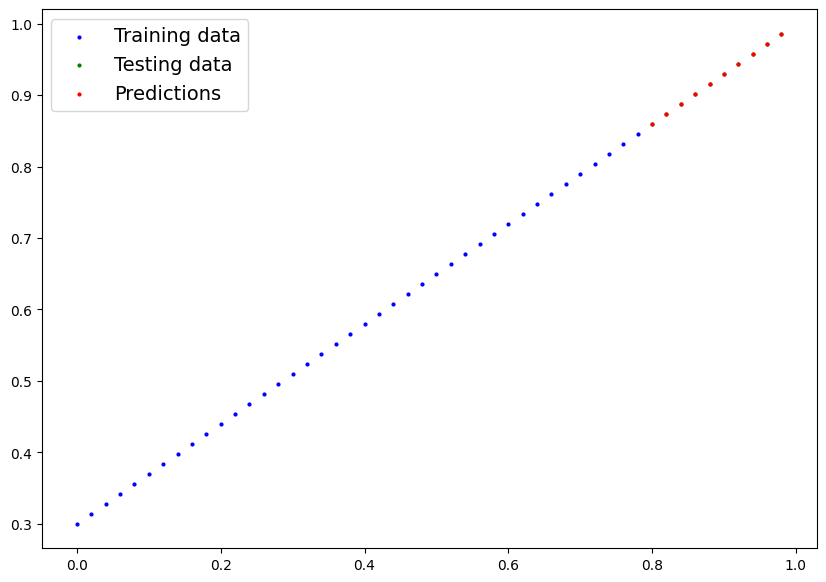

In [29]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

In [30]:
epochs = 10

for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
for epoch in range(epochs):
  model_0.eval()
  with torch.inference_mode():
    y_pred = model_0(X_test)
    loss = loss_fn(y_pred, y_test)
model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

## Saving (and loading) a model in PyTorch

There are three main methods for saving and loading models in PyTorch

1. `torch.save()` - Save a PyTorch object in Python's pickle format
2. `torch.load()` - load a saved PyTorch object
3. torch.nn.Module.load_state_dict() - Allows to laod a model's saved state dictionary

In [31]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [32]:
# Saving our PyTorch mode
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Saving model to: {MODEL_SAVE_PATH}")

# 3. Save the model state dict
torch.save(model_0.state_dict(),
           MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pt


In [33]:
!ls models/

01_pytorch_workflow_model_0.pt	01_pytorch_workflow_model_1.pt


Since we only made our model's `state_dict` rather than the entire model, we need to create a new instance of our model class

In [34]:
loaded_model_0 = LinearRegressionModel()
print(f"New Model Instance: {loaded_model_0.state_dict()}")
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH,
                        weights_only = True)) # This is set to true by default
print(f"Loaded Model Instance: {loaded_model_0.state_dict()}")

New Model Instance: OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
Loaded Model Instance: OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])


In [35]:
model_0.eval()
with torch.inference_mode():
  y_pred = model_0(X_test)
# Make some predictions with the loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8593],
        [0.8733],
        [0.8873],
        [0.9013],
        [0.9152],
        [0.9292],
        [0.9432],
        [0.9572],
        [0.9712],
        [0.9852]])

In [36]:
# Compare loaded model preds with original model preds
y_pred == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through it all and see it in one place

In [37]:
 import torch
 from torch import nn
 import numpy as np
 import matplotlib.pyplot as plt
 from sklearn.model_selection import train_test_split
 from pathlib import Path

 ## Check PyTorch version
 print(f"PyTorch version: {torch.__version__}")

## Setup device-agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device == 'cuda':
  print(f"Device: {torch.cuda.get_device_name(0)}")
  print(f"Device count: {torch.cuda.device_count()}")
  print(f"Device index: {torch.cuda.current_device()}")
  print(f"Device memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3} GB")
  print(f"Device memory allocated: {torch.cuda.memory_allocated(0) / 1024**3} GB")
  print(f"Device memory cached: {torch.cuda.memory_reserved(0) / 1024**3} GB")
else:
  print(f"Device: {device}")

PyTorch version: 2.6.0+cu124
Device: Tesla T4
Device count: 1
Device index: 0
Device memory: 14.74127197265625 GB
Device memory allocated: 0.0 GB
Device memory cached: 0.0 GB


In [38]:
!nvidia-smi

Fri Jun 13 23:48:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   61C    P8             12W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### 6.1 Data Generation

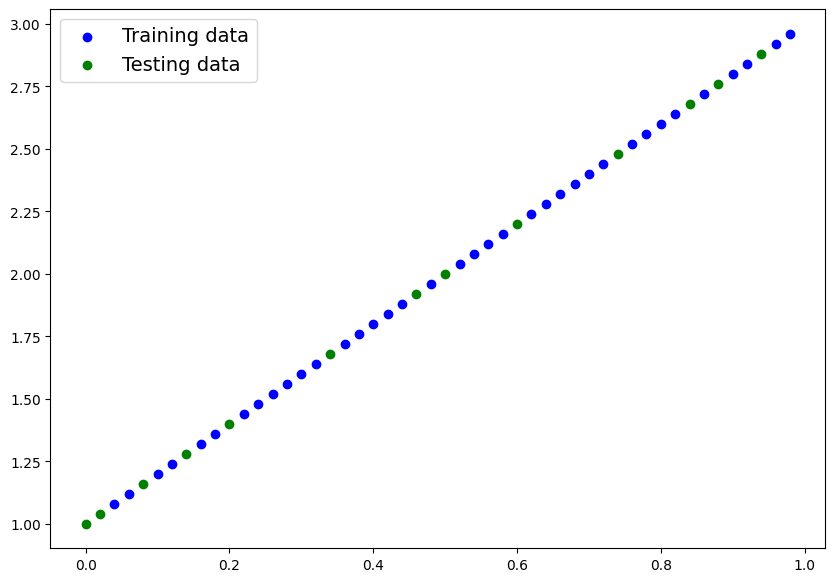

In [39]:
tensor_data = torch.arange(0, 1, .02).unsqueeze(1)
X_train, X_test = train_test_split(tensor_data)
y_train, y_test = 2 * X_train + 1, 2 * X_test + 1

X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data.cpu(), train_labels.cpu(), c="b", label="Training data") # Move to CPU

  # Plot test data in green
  plt.scatter(test_data.cpu(), test_labels.cpu(), c="g", label="Testing data") # Move to CPU

  if predictions is not None:
    # Plot the predictions in red, if they exist
    plt.scatter(test_data.cpu(), predictions.cpu(), c="r", label="Predictions") # Move to CPU

  # Show the legend
  plt.legend(prop={"size": 14});

plot_predictions()

### 6.2 Model Selection

In [40]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    # self.weights = nn.Parameter(torch.randn(1, dtype=torch.float))
    # self.bias = nn.Parameter(torch.randn(1, dtype=torch.float))

    # Use nn.Linear() for creating the model parameters
    # Linear transformation, probing layer, fully connected layer, dense layer, etc.
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    #return self.weights * x + self.bias # Corrected from self.weight to self.weights
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.to(device)

print(f"Model parameters: {model_1.state_dict()}")
print(f"Model on device: {next(model_1.parameters()).device}")
model_1, model_1.state_dict()

Model parameters: OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')), ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])
Model on device: cuda:0


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.8300], device='cuda:0'))]))

In [41]:
model_1(X_test).cpu().detach().numpy()

array([[1.288731  ],
       [1.5486741 ],
       [1.5028018 ],
       [0.9370433 ],
       [1.2122772 ],
       [1.089951  ],
       [0.891171  ],
       [0.8452987 ],
       [1.1816956 ],
       [0.8300079 ],
       [0.98291564],
       [1.4722203 ],
       [1.3957664 ]], dtype=float32)

In [42]:
type(model_1(X_test).detach().cpu())

torch.Tensor

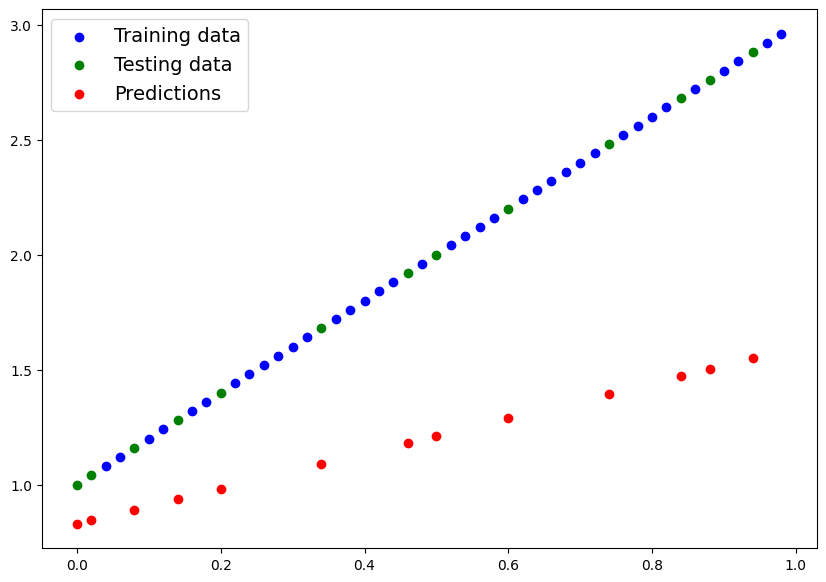

In [43]:
plot_predictions(predictions=model_1(X_test).detach().cpu())

### 6.3/6.4 Train and evaluate the model (6.5 Experimentation)

Parameters before training: <bound method Module.state_dict of LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)>
Epoch: 0 | Loss: 0.7964044213294983 | Test loss: 0.703257143497467
Epoch: 100 | Loss: 0.1943323016166687 | Test loss: 0.23417890071868896
Epoch: 200 | Loss: 0.14434006810188293 | Test loss: 0.18339204788208008
Epoch: 300 | Loss: 0.10128351300954819 | Test loss: 0.12848682701587677
Epoch: 400 | Loss: 0.05822101980447769 | Test loss: 0.07361764460802078
Epoch: 500 | Loss: 0.015150689519941807 | Test loss: 0.018784532323479652
Epoch: 600 | Loss: 0.006675323937088251 | Test loss: 0.005239431746304035
Epoch: 700 | Loss: 0.006675323937088251 | Test loss: 0.005239431746304035
Epoch: 800 | Loss: 0.006675323937088251 | Test loss: 0.005239431746304035
Epoch: 900 | Loss: 0.006675323937088251 | Test loss: 0.005239431746304035
Parameters after training: <bound method Module.state_dict of LinearRegressionModelV2(
  (linear_layer): Linear(in_fea

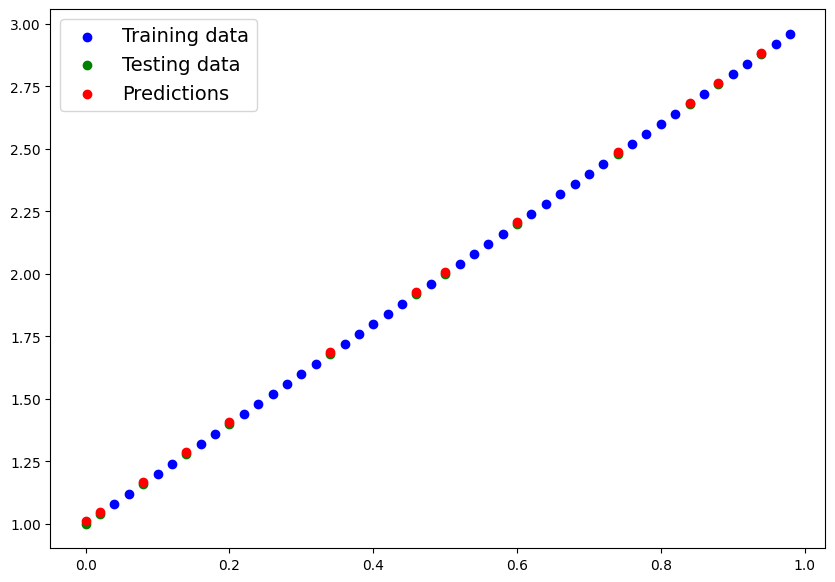

In [44]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_1.parameters(), 0.01)

epochs = 1000

epochs_count = []
loss_values = []
test_loss_values = []

print(f"Parameters before training: {model_1.state_dict}")
torch.manual_seed(42)
for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
    epochs_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

print(f"Parameters after training: {model_1.state_dict}")

plot_predictions(predictions=model_1(X_test).detach().cpu())

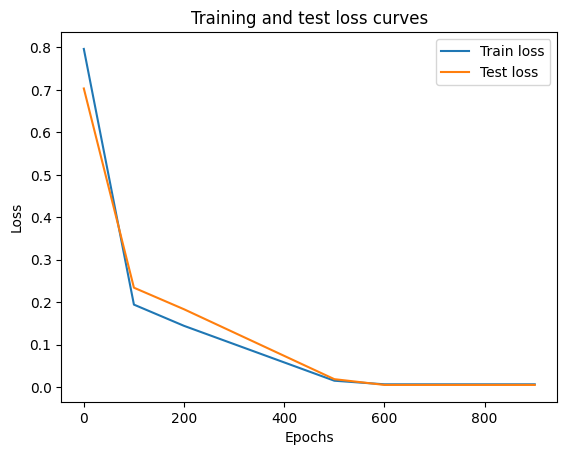

In [45]:
# Plot the loss curves
plt.plot(epochs_count, torch.tensor(loss_values).cpu(), label="Train loss")
plt.plot(epochs_count, torch.tensor(test_loss_values).cpu(), label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## 6.6 Save and reload the model


In [46]:
SAVE_PATH = Path("models")
SAVE_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_1.pt"
MODEL_SAVE_PATH = SAVE_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")

torch.save(model_1.state_dict(), MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pt


Loaded model parameters (before loading): OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')), ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])


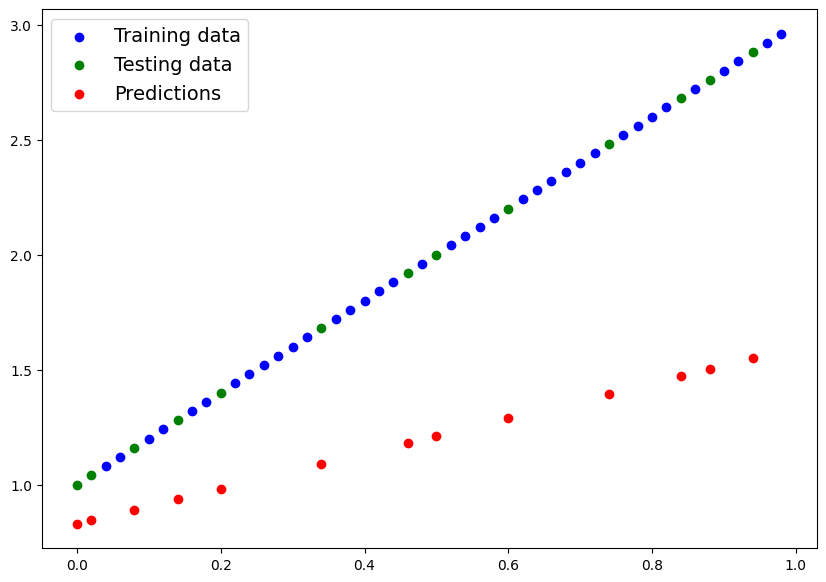

In [47]:
torch.manual_seed(42)
loaded_model_1 = LinearRegressionModelV2()
if torch.cuda.is_available(): # Device-agnostic code
  loaded_model_1.to(device)
print(f"Loaded model parameters (before loading): {loaded_model_1.state_dict()}")
plot_predictions(predictions=loaded_model_1(X_test).detach().cpu())

Loaded model parameters: OrderedDict([('linear_layer.weight', tensor([[1.9951]], device='cuda:0')), ('linear_layer.bias', tensor([1.0092], device='cuda:0'))])


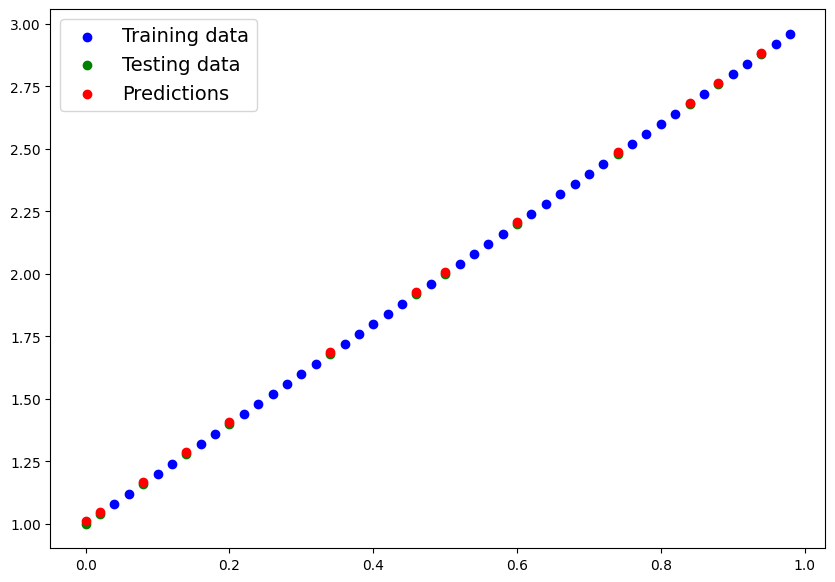

In [48]:
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
print(f"Loaded model parameters: {loaded_model_1.state_dict()}")
plot_predictions(predictions=loaded_model_1(X_test).detach().cpu())

In [49]:
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
  model_1_preds = model_1(X_test)
loaded_model_1_preds == model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

In [50]:
# # Loading the other model on this data to see if they are the same
# MODEL_NAME = "01_pytorch_workflow_model_0.pt"
# MODEL_SAVE_PATH = SAVE_PATH / MODEL_NAME
# loaded_model_0 = LinearRegressionModel()
# print(f"Loaded model parameters: {loaded_model_0.state_dict()}")
# loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))
# print(f"Loaded model parameters: {loaded_model_0.state_dict()}")
# plot_predictions(predictions=loaded_model_0(X_test).detach().numpy())

## Error because first model was trained without using `linear_layer`, but the second models was trained with it. Thus, there are key errors